## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [2]:
import pandas as pd

file_path = "heart_failure_clinical_records_dataset.csv"
data_hf = pd.read_csv(file_path)

print(data_hf.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [3]:
data_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [5]:
missing_values = data_hf.isnull().sum()
missing_col = missing_values[missing_values > 0]

print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [6]:
selected_columns = ["age", "anaemia", "high_blood_pressure", "serum_sodium", "DEATH_EVENT"]

column_types = data_hf[selected_columns].dtypes
variable_types = {col: "numerická" if column_types[col] in ["int64", "float64"] else "kategorická" for col in selected_columns}

for col, var_type in variable_types.items():
    print(f"{col}: {var_type}")

age: numerická
anaemia: numerická
high_blood_pressure: numerická
serum_sodium: numerická
DEATH_EVENT: numerická


In [7]:
print(data_hf.dtypes)


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [15]:
duplicate_rows = data_hf.duplicated().sum()
print(f"Počet duplicitných záznamov: {duplicate_rows}")

Počet duplicitných záznamov: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [16]:
sex_distribution = data_hf['sex'].value_counts()
print(sex_distribution)

sex
1    194
0    105
Name: count, dtype: int64


**Koľko záznamov mužov a žien obsahuje dataset?**

In [17]:
sex_counts = data_hf['sex'].value_counts()
sex_counts.index = ["Ženy (0)", "Muži (1)"]

print(sex_counts)

Ženy (0)    194
Muži (1)    105
Name: count, dtype: int64


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [18]:
non_smokers = data_hf[data_hf['smoking'] == 0].groupby('sex').size()
non_smokers.index = ["Ženy (0)", "Muži (1)"]

print(non_smokers)

Ženy (0)    101
Muži (1)    102
dtype: int64


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [19]:
age_description = data_hf['age'].describe()

print(age_description)

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [20]:
min_age = data_hf['age'].min()
max_age = data_hf['age'].max()
mean_age = data_hf['age'].mean()

print(f"Minimálny vek pacienta: {min_age}")
print(f"Maximálny vek pacienta: {max_age}")
print(f"Priemerný vek pacienta: {mean_age:.2f}")

Minimálny vek pacienta: 40.0
Maximálny vek pacienta: 95.0
Priemerný vek pacienta: 60.83


**Z akého veku je v datasete najviac záznamov?**

In [21]:
most_common_age = data_hf['age'].mode()[0]
age_count = data_hf['age'].value_counts().loc[most_common_age]
print(f"Najčastejšie sa vyskytujúci vek: {most_common_age}, počet výskytov: {age_count}")

Najčastejšie sa vyskytujúci vek: 60.0, počet výskytov: 33


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

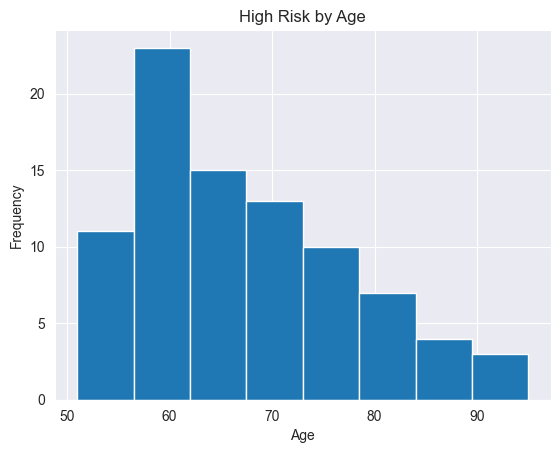

In [22]:
import matplotlib.pyplot as plt
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

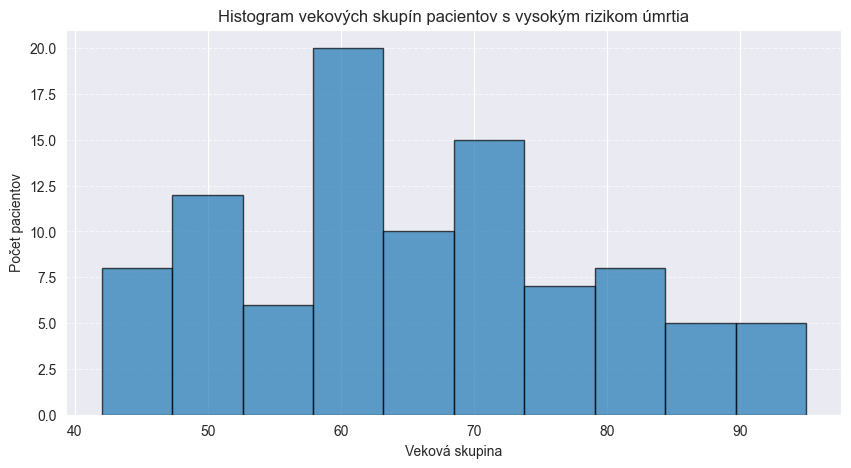

In [23]:
high_risk_patients = data_hf[data_hf['DEATH_EVENT'] == 1]

plt.figure(figsize=(10, 5))
plt.hist(high_risk_patients['age'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel("Veková skupina")
plt.ylabel("Počet pacientov")
plt.title("Histogram vekových skupín pacientov s vysokým rizikom úmrtia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [24]:
high_risk_patients = data_hf[data_hf['DEATH_EVENT'] == 1]
most_common_high_risk_age = high_risk_patients['age'].mode()[0]
age_count_high_risk = high_risk_patients['age'].value_counts().loc[most_common_high_risk_age]
print(f"Najväčšie riziko zlyhania srdca je vo veku: {most_common_high_risk_age} rokov, počet pacientov: {age_count_high_risk}")

Najväčšie riziko zlyhania srdca je vo veku: 60.0 rokov, počet pacientov: 13


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [25]:
age_group_count = data_hf[data_hf['age'] == most_common_high_risk_age].shape[0]
print(f"Počet záznamov vo vekovej kategórii {most_common_high_risk_age} rokov: {age_group_count}")


Počet záznamov vo vekovej kategórii 60.0 rokov: 33


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


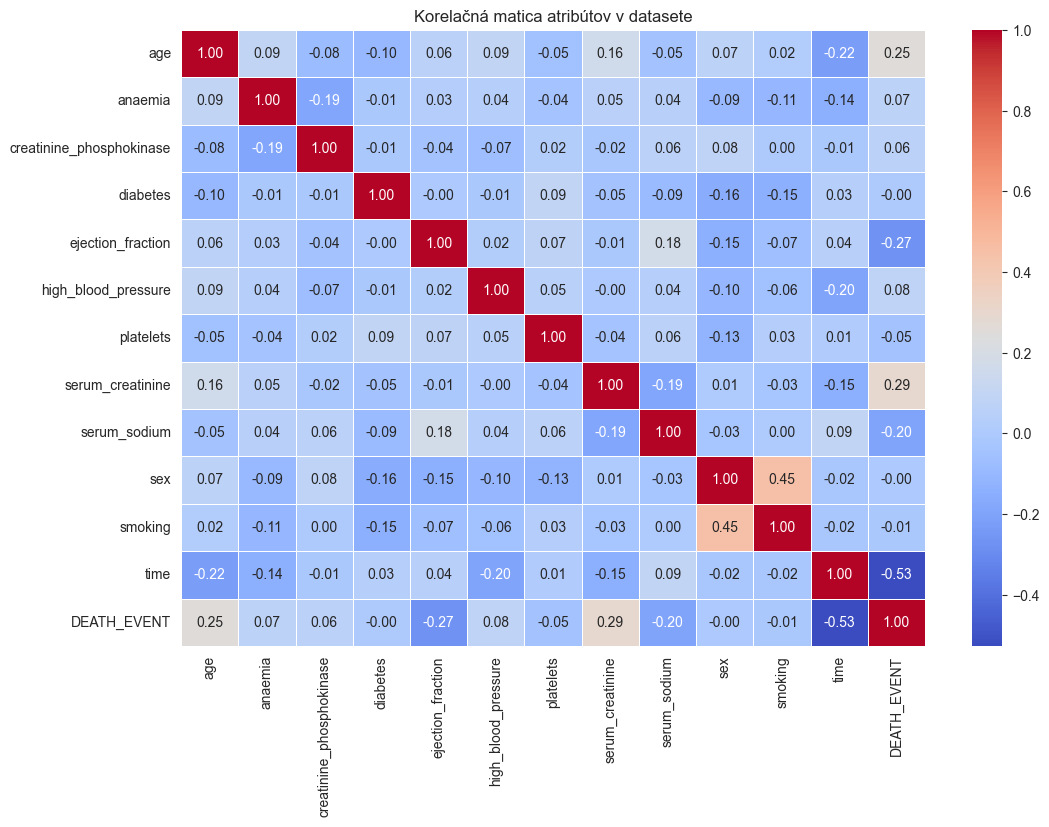

In [27]:
import seaborn as sns

numeric_data = data_hf.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelačná matica atribútov v datasete")
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [28]:
correlation_matrix = data_hf.select_dtypes(include=['int64', 'float64']).corr()
correlation_pairs = correlation_matrix.unstack().sort_values()
correlation_pairs = correlation_pairs[correlation_pairs < 0]  # Len záporné hodnoty
correlation_pairs = correlation_pairs.drop_duplicates()
top_negative_correlations = correlation_pairs.head(2)

print("Dvojice atribútov s najväčšou zápornou koreláciou:")
for (attr1, attr2), corr in top_negative_correlations.items():
    print(f"{attr1} - {attr2}: {corr:.2f}")

Dvojice atribútov s najväčšou zápornou koreláciou:
DEATH_EVENT - time: -0.53
ejection_fraction - DEATH_EVENT: -0.27


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [8]:
correlation_matrix = data_hf.select_dtypes(include=['int64', 'float64']).corr()
correlation_pairs = correlation_matrix.unstack().sort_values()
correlation_pairs = correlation_pairs.drop_duplicates()
top_negative_correlations = correlation_pairs.tail(2)
#dd

print("Dvojice atribútov s najväčšou zápornou koreláciou:")
for (attr1, attr2), corr in top_negative_correlations.items():
    print(f"{attr1} - {attr2}: {corr:.2f}")

Dvojice atribútov s najväčšou zápornou koreláciou:
sex - smoking: 0.45
age - age: 1.00


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure